In [162]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Problem

A Romania -based credit card issuer, Viva-Credit,wants to better predict
the likelihood of default for its customers, as well as identify the key drivers that determine this
likelihood.


# Data Preprocessing

In [2]:
df1=pd.read_csv(r"C:\Users\anoop\Downloads\case study\credit.csv")

In [3]:
df1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Exploratory data Analysis

Let's See 1st there is any Null value or Not

In [4]:
df1.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

So No Value Is null,such a relief  😅😅

In [5]:
df1.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default_payment_next_month      int64
dtype: object

So all Columns are numeric

Let's se the corelation Table and then to confirm the corelation,i will try to see it graphicaly so that if possible,i will perform dimensionality reduction for columns.

In [6]:
df1.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


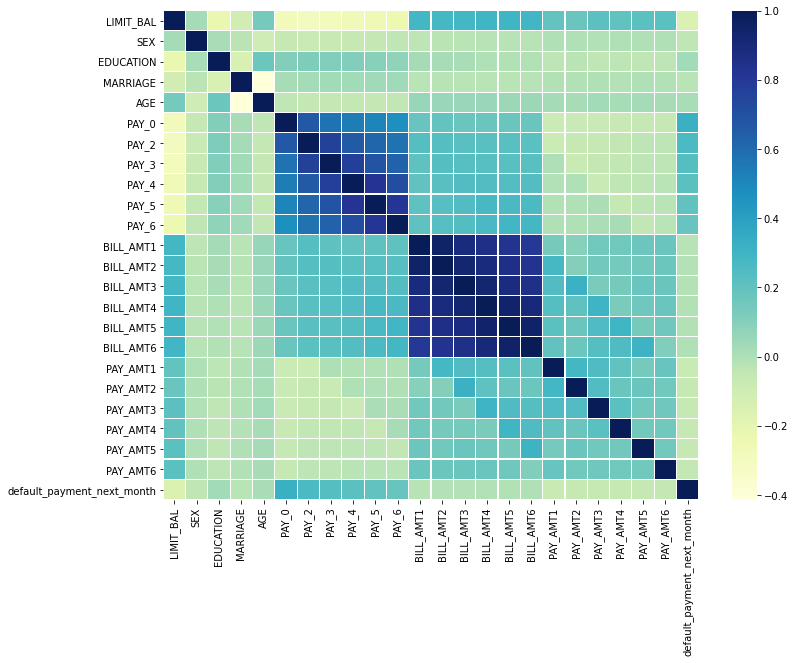

In [7]:
mat=df1.corr()
f,ax=plt.subplots(figsize=(12,9))
sn.heatmap(mat,ax=ax,cmap="YlGnBu",linewidths=0.1)

we can see that all the PAY and bill amounts have  a very high correlation value among other pay and bill amount. So i will remove both of them and only took one of each

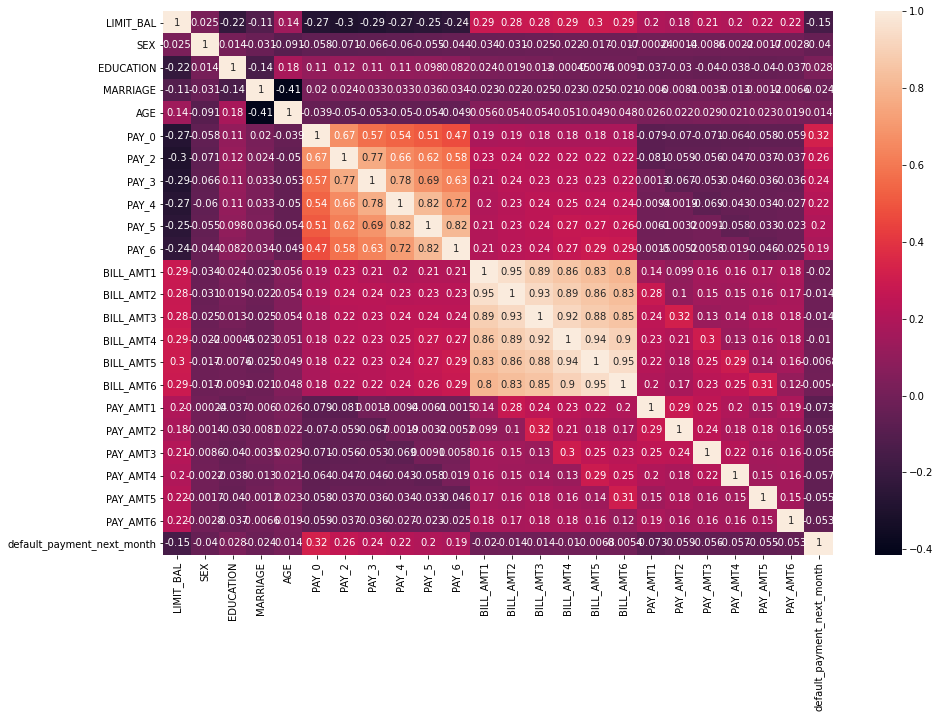

In [8]:
plt.figure(figsize=(15,10))
sn.heatmap(df1.corr(),annot=True)

In [9]:
df2=df1.drop(["PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",],axis=1)


In [10]:
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [11]:
df2.shape

(30000, 14)

In [12]:
df2

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,188948.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,1683.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3565.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1645.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [13]:
max(df1["LIMIT_BAL"])

1000000.0

In [14]:
df1["LIMIT_BAL"].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

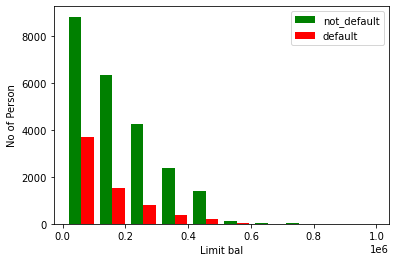

In [15]:
a=df1[df1["default_payment_next_month"]==0].LIMIT_BAL
b=df1[df1["default_payment_next_month"]==1].LIMIT_BAL
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("Limit bal")
plt.legend()

Maximum limit_bal were given under 5 lakhs amount
here we can see above 6 lakh,there is no default Payment.

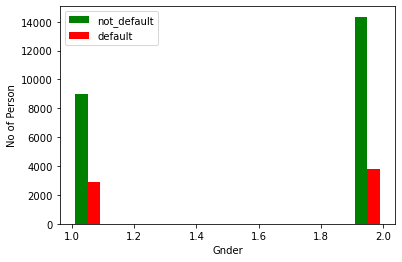

In [16]:
a=df1[df1["default_payment_next_month"]==0].SEX
b=df1[df1["default_payment_next_month"]==1].SEX
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("Gnder")
plt.legend()

Here interesting thing is that maximum loan are give to female.But as we can see by graph,it doesn't contributing much on giving information about default

In [17]:
df2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default_payment_next_month'],
      dtype='object')

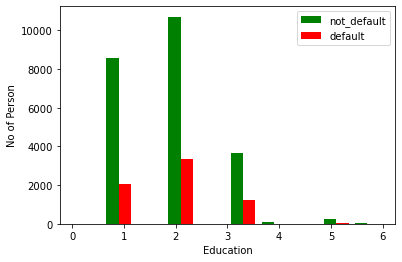

In [18]:
a=df1[df1["default_payment_next_month"]==0].EDUCATION
b=df1[df1["default_payment_next_month"]==1].EDUCATION
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("Education")
plt.legend()

 Education Level above 4 have minimum chances of default Payment

As we can see above 4 there are very less values,so we will convert it into 4 only

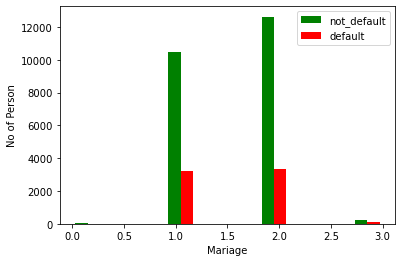

In [19]:
a=df1[df1["default_payment_next_month"]==0].MARRIAGE
b=df1[df1["default_payment_next_month"]==1].MARRIAGE
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("Mariage")
plt.legend()

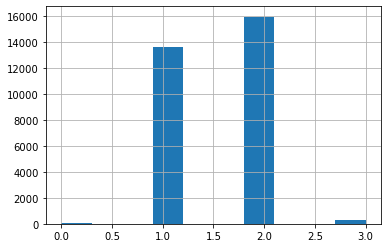

In [20]:
df1["MARRIAGE"].hist()

People having marriage status 0 have 100% chances of non-defaulters 

so 0 and 3 are very less.So as 3 is more than 0,i will later convert 0 into 3(as others) later

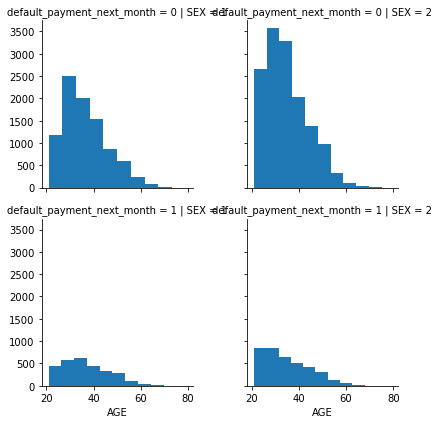

In [21]:

graph=sn.FacetGrid(df1, row="default_payment_next_month", col="SEX")
graph=graph.map(plt.hist,"AGE")

So we can see that women of age 20-40 are having maximum chances for default 

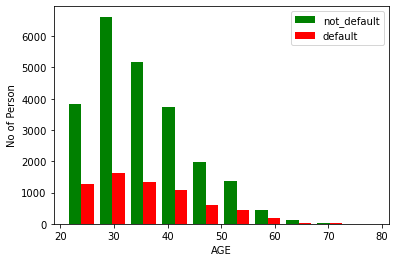

In [22]:
a=df1[df1["default_payment_next_month"]==0].AGE
b=df1[df1["default_payment_next_month"]==1].AGE
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("AGE")
plt.legend()

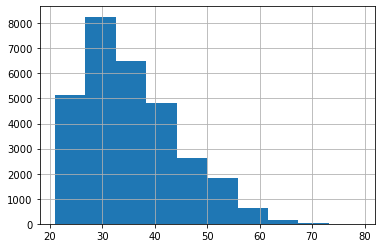

In [23]:
df1["AGE"].hist()

it came out to be a skew graph,mean it will effect our prediction

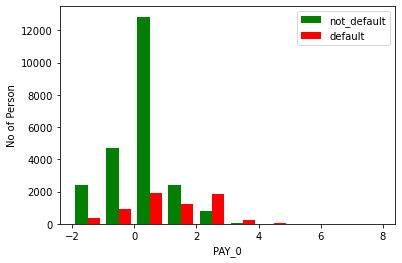

In [24]:
a=df1[df1["default_payment_next_month"]==0].PAY_0
b=df1[df1["default_payment_next_month"]==1].PAY_0
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("PAY_0")
plt.legend()

So Here We can Conclude that whoever having payment delays more than 2 months there are very high chances that they are going to be default.Anything above 3 or 3, will convert it into 3.To make model more accurate
BEcause of collinearity same goes for others PAY(eg-PAY_2,PAY_3,etc)

In [25]:
df1["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

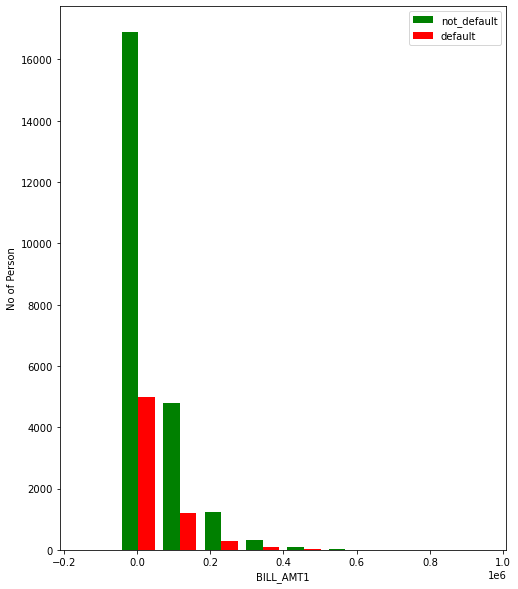

In [26]:
plt.figure(figsize=(8,10))
a=df1[df1["default_payment_next_month"]==0].BILL_AMT1
b=df1[df1["default_payment_next_month"]==1].BILL_AMT1
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("BILL_AMT1")
plt.legend()

People having more than Bill amount 5 lakh are going to be 100% non Defaulters

Anything more than 4 lakh will be an outlier for model making

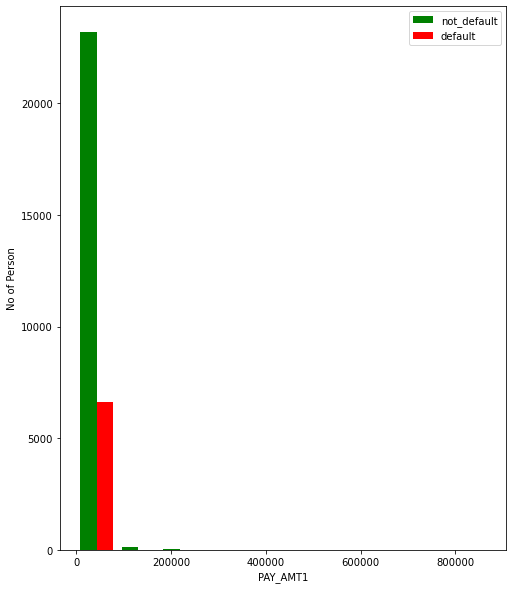

In [27]:
plt.figure(figsize=(8,10))
a=df1[df1["default_payment_next_month"]==0].PAY_AMT1
b=df1[df1["default_payment_next_month"]==1].PAY_AMT1
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("PAY_AMT1")
plt.legend()

Any person Having More than Pay amount 1 lakh will be a non Defaulter.More than 1 lakh i will take as an outlier

In [28]:
df1["PAY_AMT1"].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

SO we can conclude that if the PAY_AMT1 or payment of  more than 10,000 is done there probably no chances for default

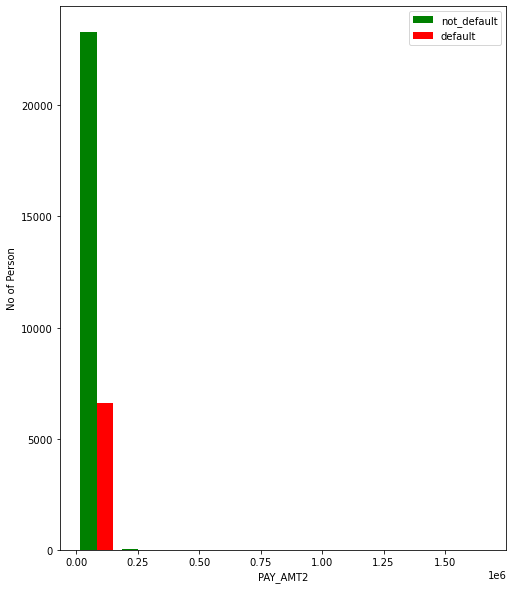

In [29]:
plt.figure(figsize=(8,10))
a=df1[df1["default_payment_next_month"]==0].PAY_AMT2
b=df1[df1["default_payment_next_month"]==1].PAY_AMT2
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("PAY_AMT2")
plt.legend()

In [30]:
max(df2["PAY_AMT2"])

1684259.0

Again If there is PAY_AMT2 more than 2 lakhs aprrox no chances for default


In [31]:
df2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default_payment_next_month'],
      dtype='object')

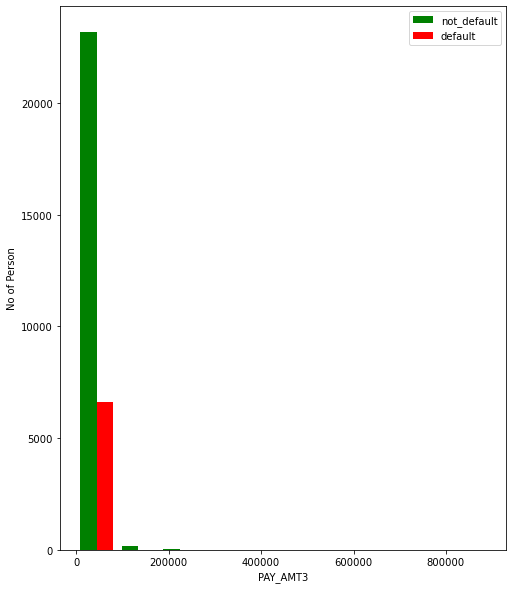

In [32]:
plt.figure(figsize=(8,10))
a=df1[df1["default_payment_next_month"]==0].PAY_AMT3
b=df1[df1["default_payment_next_month"]==1].PAY_AMT3
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("PAY_AMT3")
plt.legend()

Here more than 1 lakh no chances of default

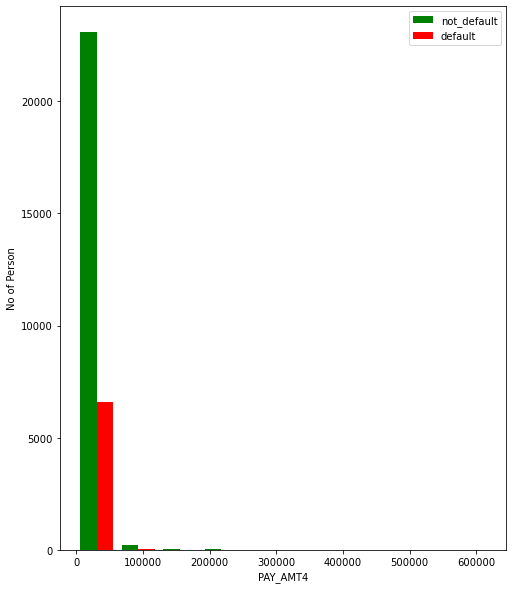

In [33]:
plt.figure(figsize=(8,10))
a=df1[df1["default_payment_next_month"]==0].PAY_AMT4
b=df1[df1["default_payment_next_month"]==1].PAY_AMT4
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("PAY_AMT4")
plt.legend()

Here we can see pay_amt4 is more than 1 lakh very less chances of dafaulter

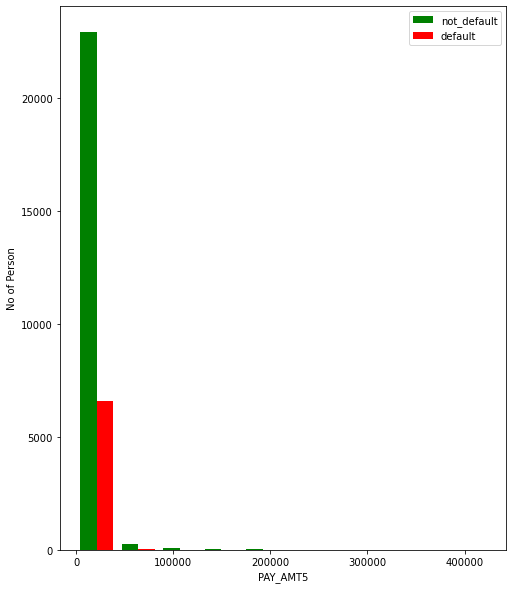

In [34]:
plt.figure(figsize=(8,10))
a=df1[df1["default_payment_next_month"]==0].PAY_AMT5
b=df1[df1["default_payment_next_month"]==1].PAY_AMT5
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("PAY_AMT5")
plt.legend()

Here It will be lakh

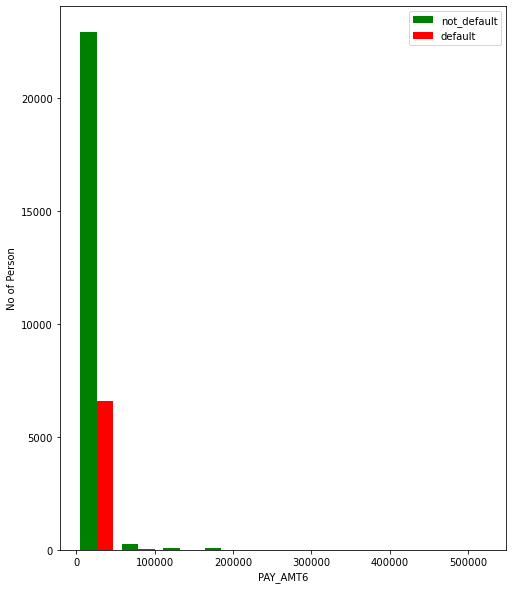

In [35]:
plt.figure(figsize=(8,10))
a=df1[df1["default_payment_next_month"]==0].PAY_AMT6
b=df1[df1["default_payment_next_month"]==1].PAY_AMT6
plt.hist([a,b],color=["green","red"],label=["not_default","default"],bins=(10))
plt.ylabel("No of Person")
plt.xlabel("PAY_AMT6")
plt.legend()

Here again Lakh

In [36]:
df2

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,188948.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,1683.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3565.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1645.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Data Cleaning

In [37]:
df2["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [38]:
df2["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [39]:
df2["EDUCATION"]=df2["EDUCATION"].replace({
    5:4,
    6:4,
})
df2["MARRIAGE"]=df2["MARRIAGE"].replace({
    0:3
})
df2["PAY_0"]=df2["PAY_0"].replace({
    5:4,
    6:4,
    7:4,
    8:4
})

In [40]:
df2["EDUCATION"].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [41]:
df2.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
BILL_AMT1                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

Outlier Removing Using IQR

In [42]:
df2[['LIMIT_BAL','BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']].describe()

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,73635.860576,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,-165580.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,3558.750000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,22381.500000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67091.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,964511.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [43]:
Q1=df2.LIMIT_BAL.quantile(0.25)
Q3=df2.LIMIT_BAL.quantile(0.75)
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit,upper_limit)

-235000.0 525000.0


In [44]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [45]:
df3=df2.copy()

In [46]:
df3=df3[df3["LIMIT_BAL"]<=535000]
df3.shape

(29843, 14)

let's do once again with std method

In [47]:
ulimit=df3.LIMIT_BAL.mean()+3*df3.LIMIT_BAL.std()
llimit=df3.LIMIT_BAL.mean()-3*df3.LIMIT_BAL.std()
print(llimit,ulimit)
df3=df3[(df3["LIMIT_BAL"]<ulimit)]
df3.shape

-211971.69676595868 542142.9047544317


(29843, 14)

In [48]:
df3=df3[df3["PAY_AMT1"]<=100000]
df3.shape

(29697, 14)

In [49]:
Q1=df2.AGE.quantile(0.25)
Q3=df2.AGE.quantile(0.75)
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit,upper_limit)

8.5 60.5


For age,anyone I think less Than 18 will be an outlier and age more than 60 will be also outlier

In [50]:
df3=df3[df3["AGE"]<61]
df3=df3[df3["AGE"]>18]
df3.shape

(29430, 14)

In [51]:
Q1=df3.BILL_AMT1.quantile(0.25)
Q3=df3.BILL_AMT1.quantile(0.75)
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit,upper_limit)

-90595.25 160462.75


In [52]:
#df3=df3[df3["BILL_AMT1"]<upper_limit]
#df3.shape

I will do this by above graph as anything more than 400000 will be an outlier

In [53]:
len(df3[df3["BILL_AMT1"]>400000])

136

In [54]:
df3["PAY_AMT1"].quantile(0.98)

31861.9399999999

In [55]:
df3["PAY_AMT1"].quantile(0.1)

0.0

In [56]:
df3=df3[df3["PAY_AMT1"]<31861]
df3.shape

(28841, 14)

Not going Below level as by seen by Graph,there are very much value on lower level

In [57]:
len(df3[df3["PAY_AMT3"]>100000])

136

In [58]:
df3=df3[df3["PAY_AMT3"]<100000]
df3.shape

(28698, 14)

In [59]:
len(df3["PAY_AMT2"]>200000)

28698

In [60]:
len(df3[df3["PAY_AMT4"]>100000])

121

In [61]:
df3=df3[df3["PAY_AMT4"]<100000]
df3.shape

(28569, 14)

In [62]:
df3["PAY_AMT5"].quantile(0.99)

54692.359999999986

In [63]:
len(df3[df3["PAY_AMT5"]<70000])

28353

In [64]:
df3=df3[df3["PAY_AMT5"]<70000]
df3.shape

(28353, 14)

In [65]:
len(df3[df3["PAY_AMT6"]<70000])

28072

In [66]:
df3=df3[df3["PAY_AMT6"]<70000]
df3.shape

(28072, 14)

In [67]:
df3.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
BILL_AMT1                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

# Data Tranformation

In [68]:
df2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default_payment_next_month'],
      dtype='object')

In [69]:
S=StandardScaler()
df4=df3.copy()
df4[["LIMIT_BAL","AGE","PAY_0","BILL_AMT1","PAY_AMT1",
     "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]=S.fit_transform(df4[["LIMIT_BAL","AGE","PAY_0","BILL_AMT1",
                                                                                   "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]])

In [70]:
df4

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,-1.135041,2,2,1,-1.258146,1.818855,-0.653172,-0.783083,-0.290071,-0.500932,-0.460946,-0.529835,-0.512409,1
1,-0.316745,2,2,2,-1.032624,-0.907582,-0.671052,-0.783083,-0.269019,-0.370813,-0.334201,-0.529835,-0.204324,1
2,-0.562234,2,2,2,-0.130536,0.001230,-0.285315,-0.457839,-0.235175,-0.370813,-0.334201,-0.371324,0.257802,0
3,-0.889552,2,2,1,0.207747,0.001230,-0.027485,-0.354566,-0.200044,-0.344789,-0.321527,-0.360387,-0.358367,0
4,-0.889552,1,2,1,2.462968,-0.907582,-0.584847,-0.354566,2.146211,0.800257,0.679757,-0.420621,-0.407814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,-0.644064,1,2,2,-0.130536,1.818855,0.343873,0.716728,-0.099795,-0.500932,0.426267,-0.529835,0.103760,1
29995,0.501550,1,3,1,0.433270,0.001230,2.034435,1.038116,1.017082,0.150053,-0.074755,0.262720,-0.358367,0
29996,-0.071257,1,3,2,0.884314,-0.907582,-0.685562,-0.389490,-0.098035,0.669878,-0.444596,-0.529835,-0.512409,0
29997,-1.053211,1,2,2,0.207747,3.636479,-0.658227,-0.783083,-0.336709,2.361683,0.071382,-0.212813,-0.034878,1


In [71]:
df4.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
BILL_AMT1                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

# Model Building

In [72]:
x=df3.drop("default_payment_next_month",1)
y=df3["default_payment_next_month"]

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [74]:
cross_val_score(DecisionTreeClassifier(),x_train,y_train)

array([0.71927872, 0.71994657, 0.72122022, 0.71943888, 0.70986417])

In [75]:
cross_val_score(RandomForestClassifier(),x_train,y_train)

array([0.80988424, 0.80988424, 0.81652193, 0.8078379 , 0.80961924])

In [76]:
cross_val_score(LogisticRegression(max_iter=100000),x_train,y_train)

array([0.77493321, 0.77448798, 0.77466043, 0.77466043, 0.77466043])

As we can see and know that ensemble learning model tend to perform more than normal model.And is model is kind generalized as showing same accuracy

In [77]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
clf=RandomizedSearchCV(RandomForestClassifier(),{
    "n_estimators":range(500,700),
    "max_features":range(1,5),
    "max_depth":range(3,8),
    "min_samples_leaf":range(1,10)
},cv=5,return_train_score=False)
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(3, 8),
                                        'max_features': range(1, 5),
                                        'min_samples_leaf': range(1, 10),
                                        'n_estimators': range(500, 700)})

In [81]:
clf.best_params_

{'n_estimators': 686, 'min_samples_leaf': 7, 'max_features': 4, 'max_depth': 4}

In [82]:
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8219056099732859

In [83]:
clf.score(x_train,y_train)

0.8167609208709979

In [78]:
model.score(x_test,y_test)

0.8169189670525379

In [79]:
model.score(x_train,y_train)

0.9992429977289932

So i will take clf Model as my model. As it is showing very less sign of overfitting

In [84]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4294
           1       0.75      0.36      0.49      1321

    accuracy                           0.82      5615
   macro avg       0.79      0.66      0.69      5615
weighted avg       0.81      0.82      0.80      5615



In [85]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4294
           1       0.70      0.38      0.50      1321

    accuracy                           0.82      5615
   macro avg       0.77      0.67      0.69      5615
weighted avg       0.80      0.82      0.80      5615



Here i can see my model is not predicting well for class defaulter or class 1 by seeing F1 and recall.It may be beacause of imbalanced dataset

In [87]:
df4["default_payment_next_month"].value_counts()

0    21690
1     6382
Name: default_payment_next_month, dtype: int64

let's use once artificial neural network also

In [107]:
ann=keras.Sequential([
    keras.layers.Dense(10000,input_shape=(13,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(70,activation="relu"),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")   
])
ann.compile(optimizer="adam",
              loss="binary_crossentropy",
             metrics=["accuracy"])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
702/702 [==============================] - 73s 104ms/step - loss: 10.4391 - accuracy: 0.7736
Epoch 2/5
702/702 [==============================] - 73s 104ms/step - loss: 0.5558 - accuracy: 0.7746
Epoch 3/5
702/702 [==============================] - 74s 105ms/step - loss: 0.5375 - accuracy: 0.7746
Epoch 4/5
702/702 [==============================] - 73s 104ms/step - loss: 0.5341 - accuracy: 0.7746
Epoch 5/5
702/702 [==============================] - 74s 105ms/step - loss: 0.5337 - accuracy: 0.7746


In these 5 epoch we can see it is not giving much accuracy and with every epoch the accuracy is also not increasing.So no gain to further train the model.

Let's use some sampling technique and then train our model.Here i will be using smote as it will be best here from other methods 

In [90]:
smote=SMOTE(sampling_strategy="minority")
x_sample,y_sample=smote.fit_sample(x,y)

In [93]:
y.value_counts()

0    21690
1     6382
Name: default_payment_next_month, dtype: int64

In [94]:
y_sample.value_counts()

1    21690
0    21690
Name: default_payment_next_month, dtype: int64

In [124]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_sample,y_sample,test_size=0.2,random_state=5,stratify=y_sample)
model1=RandomForestClassifier()
model1.fit(x_train1,y_train1)
model1.score(x_test1,y_test1)

0.8233056708160442

In [125]:
model1.score(x_train1,y_train1)

0.9992508068234209

model1 is highly overfitting

In [127]:
y_pred1=model1.predict(x_test1)
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      4338
           1       0.84      0.80      0.82      4338

    accuracy                           0.82      8676
   macro avg       0.82      0.82      0.82      8676
weighted avg       0.82      0.82      0.82      8676



Hurray!😎😎  Now model is predicting good for both classes.But now let's solve overfitting issue

In [146]:
for i in range(16,20):   
    model2=RandomForestClassifier(n_estimators=575,max_depth=i,max_features=2,min_samples_leaf=9)
    model2.fit(x_train1,y_train1)
    print(" ",i," ",model2.score(x_test1,y_test1),model2.score(x_train1,y_train1))

  16   0.7889580451821115 0.8482307514983863
  17   0.7899953895804518 0.8516309359151683
  18   0.7902259105578607 0.8540802213001383
  19   0.7917242969110189 0.8557514983863531


In [152]:
model2=RandomForestClassifier(n_estimators=600,max_depth=20,max_features=2,min_samples_leaf=9)
model2.fit(x_train1,y_train1)

RandomForestClassifier(max_depth=20, max_features=2, min_samples_leaf=9,
                       n_estimators=600)

In [153]:
print(model2.score(x_test1,y_test1),model2.score(x_train1,y_train1))

0.7913785154449055 0.8560684647302904


In [154]:
y_pred2=model2.predict(x_test1)
print(classification_report(y_pred2,y_test1))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      4588
           1       0.76      0.81      0.79      4088

    accuracy                           0.79      8676
   macro avg       0.79      0.79      0.79      8676
weighted avg       0.79      0.79      0.79      8676



In [134]:
clf1=RandomizedSearchCV(RandomForestClassifier(),{
    "n_estimators":range(550,650),
    "max_features":range(1,4),
    "max_depth":range(7,11),
    "min_samples_leaf":range(7,11)
},cv=5,random_state=1,return_train_score=False)
clf1.fit(x_train1,y_train1)
clf1.score(x_test1,y_test1)

0.7698248040571692

In [138]:
clf1.score(x_test,y_test)

0.7761353517364203

In [139]:
clf1.score(x_train1,y_train1)

0.7948939603503918

In [136]:
clf1.best_params_

{'n_estimators': 575,
 'min_samples_leaf': 9,
 'max_features': 2,
 'max_depth': 10}

I will apply this param on above Random forest By seeing how much more i can increase max_depyh

In [137]:
y_pred1=clf1.predict(x_test1)
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      4338
           1       0.78      0.75      0.76      4338

    accuracy                           0.77      8676
   macro avg       0.77      0.77      0.77      8676
weighted avg       0.77      0.77      0.77      8676



In [105]:
x_train.shape

(22457, 13)

Above i tried RandomForest which is Bagging/Bootstrapping technique,now let's also try some Boosting methods

In [157]:
xgb=XGBClassifier(objective="binary:hinge",seed=5,scale_pos_weight=4)
xgb.fit(x_train1,y_train1)
print(xgb.score(x_test1,y_test1),xgb.score(x_train1,y_train1))

C:\Mba notes\novels\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.7935684647302904 0.8427846934071


In [160]:
lr_list=[0.05,0.75,0.1,0.3,0.8,1,0.9]
for i in lr_list:
    gb=GradientBoostingClassifier(n_estimators=20,learning_rate=i,random_state=0)
    gb.fit(x_train1,y_train1)
    print(gb.score(x_test1,y_test1),gb.score(x_train1,y_train1))

0.710696173351775 0.7151913324112494
0.7619870908252651 0.7751556016597511
0.7233748271092669 0.7291378515444905
0.7516136468418626 0.7570597049331489
0.7627939142461964 0.7755301982480406
0.7649838635315813 0.774175887505763
0.7648686030428768 0.77538612263716


Not Using AdaBoost as it will take a hell amount of time

In [161]:
y_pred=xgb.predict(x_test1)
print(classification_report(y_pred,y_test1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      4325
           1       0.80      0.79      0.79      4351

    accuracy                           0.79      8676
   macro avg       0.79      0.79      0.79      8676
weighted avg       0.79      0.79      0.79      8676



So my final model will be xgb which is defined above beacause it is giving 80% accuracy around and slightly overfitting.Also it is very fast on training(Property of xgb use less computational power).Which can be used to solve to predict the likelihood of defaulters among customers

In [163]:
xgb=XGBClassifier(objective="binary:hinge",seed=5,scale_pos_weight=4)
xgb.fit(x_sample,y_sample)
print(xgb.score(x_test1,y_test1),xgb.score(x_train1,y_train1))

C:\Mba notes\novels\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8296449976947903 0.8299331489165515


# Saving Model

In [164]:
pickle.dump(xgb,open("credit_card_model","wb"))

In [166]:
loaded_model=pickle.load(open("credit_card_model","rb"))
loaded_model.score(x_test1,y_test1)

0.8296449976947903

# Key insights to predict defaulters

1.. If the amount of given credit is more than 6 lakh,according to data there is no chances of defaulters.Also the more cedit we give,the lesser will be chances of loan defaulters.

2..Data shows If we give credit to others and unknown,they are less likely to be loan defaulters rather than person who are graduate,university,highschool.

3...It is more preferrable to give credit to singles rather than married.The class 0 which is not defined have 100% chance of non defaulters according to data.

4...As we know from data maximum credits were given to womens.Also Womens of age group 20-40 have maximum chances of defaulting loans.

5..As the number of months are increasing for pay delays.The chances of default increases.From total Persons whose pays delays for 2 months, probably 70% of the customers will be defaulters and defaulters ratio will increase more if pay delays for more month.

6..If the amount of Bill statement is more than 5 lakh.The person will be 100% non defaulter.

7..If the amount of previous payment in any mont is more than 1 lakh .There is a very high chance that it will be a non-defaulter non-defaulter.

# THE END